K-Means en Tensor Flow
----------------------

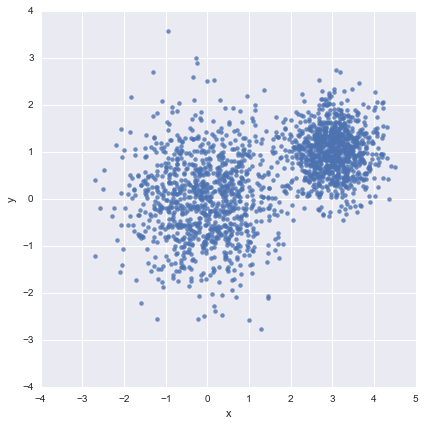

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

num_puntos = 2000
conjunto_puntos = []
for i in range(num_puntos):
    if np.random.random() > 0.5:
        conjunto_puntos.append([np.random.Generator.normal(0.0, 0.9), np.random.Generator.normal(0.0, 0.9)])
    else:
        conjunto_puntos.append([np.random.Generator.normal(3.0, 0.5), np.random.Generator.normal(1.0, 0.5)])

df = pd.DataFrame({"x": [v[0] for v in conjunto_puntos],
        "y": [v[1] for v in conjunto_puntos]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=6)
plt.show()


In [47]:
import tensorflow as tf

# datos de entrada. son constantes shape==(2000,2)
vectors = tf.constant(conjunto_puntos)
k = 4
# centroides. se irán modificando (variables).
# mezcla vectors y se queda con los k primeros. shape==(4,2)
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors),[0,0],[k,-1]))
print('vectors', vectors.get_shape())
print('centroides', centroides.get_shape())

# expandir a 3 dimensiones
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroides = tf.expand_dims(centroides, 1)
print('vectors exp', expanded_vectors.get_shape())
print('centroides exp', expanded_centroides.get_shape())

# donde está asignado cada punto.
# la resta promueve a la dimensión común.
dif = tf.sub(expanded_vectors, expanded_centroides)
sqr = tf.square(dif)
dis = tf.reduce_sum(sqr, 2)
assignments = tf.argmin(dis, 0)
print('dif', dif.get_shape())
print('sqr', sqr.get_shape())
print('dis', dis.get_shape())
print('assignments', assignments.get_shape())

def idx(c):
    # las posiciones donde el valor del tensor assignment coincide con el cluster c ¿??
    eq = tf.equal(assignments, c)
    # la posición donde se encuentran los valores "true" ¿???
    wh = tf.where(eq)
    # los índices de los puntos en el tensor vectors que pertenecen a este cluster c ¿¿???
    rs = tf.reshape(wh,[1,-1])
    if c==0: print('idx', rs.get_shape(), '[el ? es igual a 2000.]')
    return rs

def coord(c):
    # reúne las coordenadas de los puntos que forman el cluster c. ¿¿¿¿????
    co = tf.gather(vectors, idx(c))
    if c==0: print('coord', co.get_shape(), '[el ? es igual a 2000.]')
    return co

def redmean(c):
    # el valor medio de todos los puntos que pertenecen a este cluster c
    rm = tf.reduce_mean(coord(c), axis=[1])
    if c==0: print('redmean', rm.get_shape())
    return rm
  
# calcula los k means
means = tf.concat(0, [redmean(c) for c in range(k)])

# actualiza los centroides
update_centroides = tf.assign(centroides, means)

# inicializacion de variables
init_op = tf.initialize_all_variables()

# EJECUCION
sess = tf.Session()
sess.run(init_op)

for _ in range(100):
    _, centroid_values, assignment_values = sess.run([update_centroides, centroides, assignments])
    
print(centroid_values)


vectors (2000, 2)
centroides (4, 2)
vectors exp (1, 2000, 2)
centroides exp (4, 1, 2)
dif (4, 2000, 2)
sqr (4, 2000, 2)
dis (4, 2000)
assignments (2000,)
idx (1, ?) [el ? es igual a 2000.]
coord (1, ?, 2) [el ? es igual a 2000.]
redmean (1, 2)
[[ 0.44652101  0.38007101]
 [-0.66805285 -0.44840086]
 [ 3.11660171  0.62436146]
 [ 2.86310554  1.38826275]]


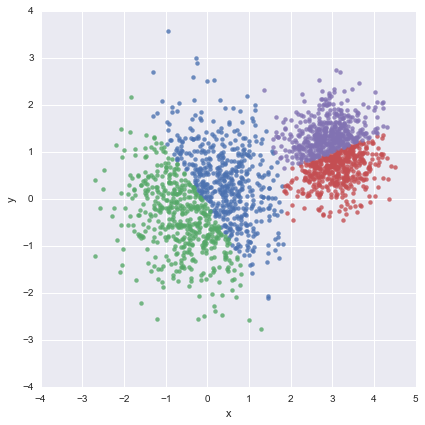

In [48]:
data = {"x": [], "y": [], "cluster": []}

for i in range(len(assignment_values)):
    data["x"].append(conjunto_puntos[i][0])
    data["y"].append(conjunto_puntos[i][1])
    data["cluster"].append(assignment_values[i])

df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df, fit_reg=False, size=6, hue="cluster", legend=False)
plt.show()